# **Ejercicio N°3:**
Escribir programa que genere y muestre por pantalla un DataFrame con los datos de la siguiente tabla:

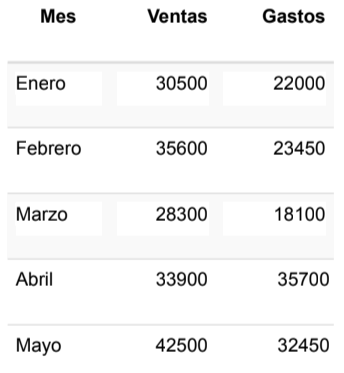

A continuación, generar nuevas columna:

1. Columna 1 = Gasto/Ventas*100.
2. Columna 2 = Si Ventas>= 30000, imprimir “Meta Superada”, caso contrario imprimir “Meta no Superada”.
3. Columna 3 = Si Gasto>Ventas, calcular el sobre gasto.
4. Obtener el total de las ventas de los últimos 3 meses
5. Obtener el total de gastos de febrero a abril


In [5]:
from pandas.core.series import Axis
import pandas as pd
mes=['Enero', 'Febrero','Marzo','Abril','Mayo']
ventas=[30500,35600,28300,33900,42500]
gastos=[22000,23450,18100,35700,32450]

dict_n={'Mes':mes, 'Ventas':ventas,'Gastos':gastos}
#print(dict_n)
#convertimos el diccionario a dataframe
df1=pd.DataFrame(dict_n,)
print(df1)

       Mes  Ventas  Gastos
0    Enero   30500   22000
1  Febrero   35600   23450
2    Marzo   28300   18100
3    Abril   33900   35700
4     Mayo   42500   32450


In [7]:
# 1. Columna 1 = Gasto/Ventas*100.
def columnauno(fila):
  resp=fila['Gastos'] / (fila['Ventas'] * 100)
  return resp
# Se agrega en una nueva columna la multiplicacion de la venta por el precio unitario
df1['Gasto/Ventas*100'] = df1.apply(columnauno, axis=1) # al usar 1 se indica que la operacion es por cada fila
print(df1)

       Mes  Ventas  Gastos  Gasto/Ventas*100
0    Enero   30500   22000          0.007213
1  Febrero   35600   23450          0.006587
2    Marzo   28300   18100          0.006396
3    Abril   33900   35700          0.010531
4     Mayo   42500   32450          0.007635


In [9]:
# Columna 2 = Si Ventas>= 30000, imprimir “Meta Superada”,
# caso contrario imprimir “Meta no Superada”.
'''
aplicando funcion lambda

df[‘nuevo nombre de columna’] = df[‘nombre de columna’].apply(lambda x: ‘valor si se cumple la condición’ if x condition else ‘valor si no se cumple la condición’)
https://barcelonageeks.com/formas-de-aplicar-una-condicion-if-en-pandas-dataframe/
'''
df1['Metas'] = df1['Ventas'].apply(lambda x: 'Metas superada' if x >= 30000 else 'Metas no Superada')
print(df1)

       Mes  Ventas  Gastos  Gasto/Ventas*100              Metas
0    Enero   30500   22000          0.007213     Metas superada
1  Febrero   35600   23450          0.006587     Metas superada
2    Marzo   28300   18100          0.006396  Metas no Superada
3    Abril   33900   35700          0.010531     Metas superada
4     Mayo   42500   32450          0.007635     Metas superada


In [12]:
# Columna 3 = Si Gasto>Ventas, calcular el sobre gasto.
def sobregasto(fila):
  respu = fila['Gastos']-fila['Ventas']
  if respu < 0:
    return 'ok'
  else:
    return respu

df1['Sobregasto']=df1.apply(sobregasto, axis=1)
print(df1)

       Mes  Ventas  Gastos  Gasto/Ventas*100              Metas Sobregasto
0    Enero   30500   22000          0.007213     Metas superada         ok
1  Febrero   35600   23450          0.006587     Metas superada         ok
2    Marzo   28300   18100          0.006396  Metas no Superada         ok
3    Abril   33900   35700          0.010531     Metas superada       1800
4     Mayo   42500   32450          0.007635     Metas superada         ok


In [13]:
# Obtener el total de las ventas de los últimos 3 meses
print(df1.tail(3))

     Mes  Ventas  Gastos  Gasto/Ventas*100              Metas Sobregasto
2  Marzo   28300   18100          0.006396  Metas no Superada         ok
3  Abril   33900   35700          0.010531     Metas superada       1800
4   Mayo   42500   32450          0.007635     Metas superada         ok


In [15]:
# Obtener el total de gastos de febrero a abril
print(df1.iloc[1:4]) # [1:4] se coloca 4 ya que devuelve un valor antes

       Mes  Ventas  Gastos  Gasto/Ventas*100              Metas Sobregasto
1  Febrero   35600   23450          0.006587     Metas superada         ok
2    Marzo   28300   18100          0.006396  Metas no Superada         ok
3    Abril   33900   35700          0.010531     Metas superada       1800
